<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series Analysis

_Authors: Arun Ahuja (NYC)_


### Learning Objectives

- Understand what time series data is and what is unique about it
- Identify common elements of time series data
- Identify common transformation of time series data
- Apply common time series transformations to a dataset using Pandas
- Define autocorrelation
- Use Pandas to explore autocorrelation
- Analyze autocorrelation in a dataset

### Lesson Guide
- [Opening: Time Series Analysis](#opening-time-series-analysis)
- [What is time series data?](#what-is-time-series-data)
	- [Time is always a factor](#time-is-always-a-factor)
	- [However, sometimes time is a key factor](#however-sometimes-time-is-a-key-factor)
	- [Where do we use time series analysis?](#where-do-we-use-time-series-analysis)
	- [Trends and Seasonality](#trends-and-seasonality)
	- [Other time phenomena](#other-time-phenomena)
- [Demo: Exploring Rossmann drugstore sales data](#demo-exploring-rossmann-drugstore-sales-data)
	- [Load Dataset and Pre-Process](#load-dataset-and-pre-process)
- [Introduction: Common analysis for time series data](#introduction-common-analysis-for-time-series-data)
	- [Aggregating time series](#aggregating-time-series)
	- [Pandas window functions](#pandas-window-functions)
	- [Pandas expanding functions](#pandas-expanding-functions)
	- [Moving Averages](#moving-averages)
	- [Exponential Weighted Moving Averages](#exponential-weighted-moving-averages)
- [Autocorrelation](#autocorrelation)
	- [Why can autocorrelation be a problem?](#why-can-autocorrelation-be-a-problem)
	- [How to compute autocorrelation](#how-to-compute-autocorrelation)
    - [Partial Autocorrelation](#partial-autocorrelation)
- [Exercises](#exercises)


<a id="opening-time-series-analysis"></a>
## Opening: Time Series Analysis

- In this class, we’ll discuss analyzing data that is changing over time.
- In most of our previous examples, we didn’t care which data points were collected earlier or later than others.
- We made assumptions that the data was not changing over time.
- This class will focus on statistics around data that is changing over time and how to measure that change.

In this lesson, we will focus on Identifying problems related to time series.

<a id="what-is-time-series-data"></a>
## What is time series data?
Objective: Understand what time series data is and what is unique about it

- Time series data is any data where the individual data points change over time.
- This is fairly common in sales and other business cases where data would likely change according to seasons and trends.
- Time series data is also useful for studying social phenomena. For instance, there is statistically more crime in the summer, which is a seasonal trend.

<a id="time-is-always-a-factor"></a>
### Time is always a factor

Most datasets are likely to have an important time component, but typically we assume that it’s fairly minimal.

For example, if we were analyzing salaries in an industry, it’s clear that salaries shift over time and vary with the economic period.

However, if we are examining the problem on a smaller scale (e.g. 3-5 years), the effect of time on salaries is much smaller than other factors, like industry or position.


<a id="however-sometimes-time-is-a-key-factor"></a>
### However, sometimes time is a key factor

When the time component is important, we need to focus on identifying the aspects of the data that are influenced by time and those that aren’t.

Time series data is a sequence of values. We will be interested in studying the changes to this series and how related individual values are.

For example, how much does this week’s sales affect next week’s?  How much does today’s stock price affect tomorrow’s?


**Think about the various datasets we’ve used so far. For each dataset, identify the time components of those datasets.  What time related features might be important to our analysis?**

Examples:
- Titanic
- Bikeshare
- Flight Delays

<a id="where-do-we-use-time-series-analysis"></a>
### Where do we use time series analysis?

- Time series analysis is useful in many fields:  sales analysis, stock market trends, studying economic phenomena, social science problems, etc.
- Cohort analysis is a particularly illuminating application.

<a id="trends-and-seasonality"></a>
### Trends and Seasonality
Typically, we are interested in separating the effects of time into two components:
- **Trends** - significant increases or decreases over time
- **Seasonality** - regularly repeating increases or decreases
- Although, there are many more time related questions that can be asked

In the following plot of fireworks injury rates from FiveThirtyEight, we can see there is an overall trend of fewer injuries with no seasonal pattern.

![](assets/images/munguia-datalab-fireworks2.png)

However, many other phenomena may be entirely seasonal. If we look at the number of searches for the New Hampshire Primary, we can see that there are clear spikes every four years and on election years.
![](assets/images/google-nh.png)

Similarly, searches for ‘gingerbread houses’ spike every year around the holiday season.

![](assets/images/google-gingerbread.png)

These spikes recur on a fixed time-scale, making them seasonal patterns.


<a id="other-time-phenomena"></a>
### Other time phenomena
Many other types of regularly occurring up or down swings may occur without a fixed timescale or period (e.g. growth vs. recession for economic trends).

- These aperiodic patterns are called cycles.
- While identifying aperiodic cycles is important, they are often treated differently than seasonal effects in practice.  
- Seasonal effects are useful for their consistency, since prior data is useful as a predictor.
- You may also see one-time spikes or transitory shocks that can be useful to capture

Searches for “iphone” have both a general trend upwards (indicating more popularity for the phone) as well as a seasonal spike in September (which is when Apple typically announces new versions).

![iphone](assets/images/google-iphone.png)

**We decompose the times series into these more understandable pieces**
- Therefore it is important to identify whether we think a change is due to an ongoing trend or seasonal change.

<a id="demo-exploring-rossmann-drugstore-sales-data"></a>
## Demo: Exploring Rossmann drugstore sales data
Objective: Perform time series analysis in Pandas including rolling mean/median and autocorrelation

We will be using data made available by a German drugstore, Rossmann.

This data contains the daily sales made at the drugstore as well as whether there was a sale or holiday affecting the sales data.

<a id="load-dataset-and-pre-process"></a>
### Load Dataset and Pre-Process

We will use the [Rossmann Store Sales](https://www.kaggle.com/c/rossmann-store-sales) dataset.  

Data Dictionary from Kaggle  

You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* Id - an Id that represents a (Store, Date) duple within the test set
* **Store** - a unique Id for each store
* **Sales** - the turnover for any given day (this is what you are predicting)
* **Customers** - the number of customers on a given day
* **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
* **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* **Promo** - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [105]:
# As always, use Pandas to load our data.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1.5)
%matplotlib inline

data = pd.read_csv('../../dataset/rossmann.csv', skipinitialspace=True, low_memory=False)

In [19]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [20]:
# Because we are most interested in the Date column, 
# we can process it as a DateTime type and set it as the index of our dataframe.

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data['Year'] = data.index.year
data['Month'] = data.index.month

In [22]:
data.head()
data.shape

(1017209, 10)

In [24]:
#This allows us to easily filter by date.  For example, to a particular year:
data['2014'].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2014-12-31,1,3,2605,327,1,0,0,1,2014,12
2014-12-31,2,3,2269,252,1,0,0,1,2014,12
2014-12-31,3,3,3804,408,1,0,0,1,2014,12
2014-12-31,4,3,10152,1311,1,0,0,1,2014,12
2014-12-31,5,3,1830,217,1,0,0,1,2014,12


In [27]:
#We can also filter to a particular month:
data['2015-05'].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-05-31,1,7,0,0,0,0,0,0,2015,5
2015-05-31,2,7,0,0,0,0,0,0,2015,5
2015-05-31,3,7,0,0,0,0,0,0,2015,5
2015-05-31,4,7,0,0,0,0,0,0,2015,5
2015-05-31,5,7,0,0,0,0,0,0,2015,5


In [28]:
# There are over a million sales data points in this dataset, so for some analysis we will focus on just one store.
store1_data = data[data.Store == 1]

**Plotting the sales data**

As we begin to study the sales from this drug store, we will also want  to know both the time dependent elements of sales as wells as whether promotions or holidays affected sales.

To start, we can simply compare the average sales on those events.

To compare sales on holidays, we can compare the sales using box plots.  This allows us to compare the distribution of sales on holidays against all other days.


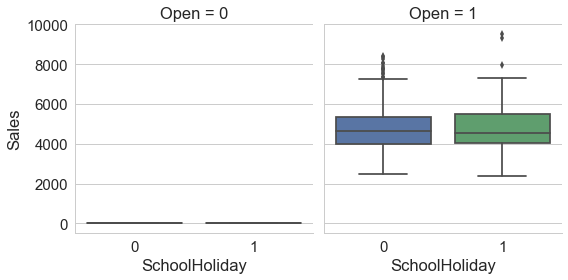

In [29]:
# On state holidays the store is closed (so there should be 0 sales).
# On school holidays, the sales are relatively similar.

sns.factorplot(
    col='Open',
    x='SchoolHoliday',
    y='Sales',
    data=store1_data, 
    kind='box'
)

**Check if there is a difference affecting sales on promotion days.**

In [ ]:
# Plot sales vs promotion days
### FILL IN ###

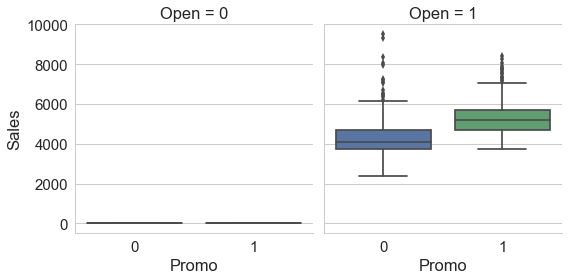

In [30]:
# We can see there is a difference in sales on promotion days.

sns.factorplot(
    col='Open',
    x='Promo',
    y='Sales',
    data=store1_data, 
    kind='box'
)

**Why is it important to separate out days where the store is closed?**

<!--
- Because there aren’t any promotions on those days either, so including them will bias your sales data on days without promotions.
- In other words, the two factors are correlated
-->

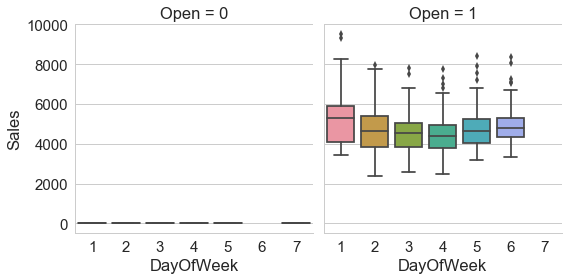

In [31]:
#Let’s compare sales across days of the week.  

sns.factorplot(
    col='Open',
    x='DayOfWeek',
    y='Sales',
    data=store1_data,
    kind='box',
)

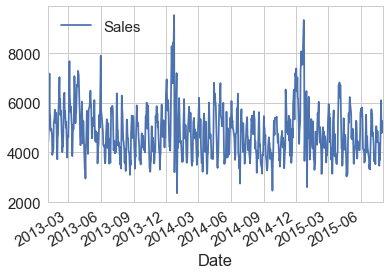

In [32]:
# Lastly, we want to identify larger scale trends in our data.
# How did sales change from 2014 to 2015?  Were any particularly interesting outliers in terms of sales or customer visits?

#To plot the sales over time:

# Filter to days store 1 was open
store1_open_data = store1_data[store1_data.Open==1]
store1_open_data[['Sales']].plot()

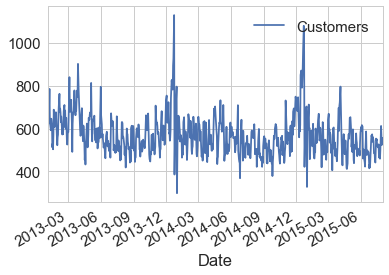

In [33]:
# To plot customer visits over time over time:

store1_open_data[['Customers']].plot()

#We can see that there are large spikes of sales and customers towards the end of 2013 and 2014 leading into the first quarter of 2014 and 2015.

**Filter to just 2014 and plot the customer data. Is it easier to identify the holiday sales bump?**

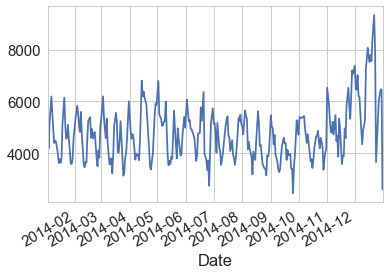

In [39]:
# Plot sales over time for 2014
store1_open_data['2014'].Sales.plot()
### FILL IN ###

<a id="introduction-common-analysis-for-time-series-data"></a>
## Introduction: Common analysis for time series data
Objective: Identify and apply common transformation of time series data

<a id="aggregating-time-series"></a>
### Aggregating time series
If we want to investigate trends over time in sales, we will start by computing simple aggregations. What were the mean and median sales in each year and each month?

In Pandas, this is performed using the resample method, which is very similar to the groupby method.  It allows us to group over different time periods.

**This is where Pandas gets awesome**

We've mostly done very simple exploratory data analysis in class when using Pandas, this is not a great way to showcase Pandas. 

What is nice about Pandas is that when we start doing many custom computations and deal with more complicated topics, Pandas does not become much more complicated to use if we know the built in shortcuts.

**We can use data.resample and provide the following arguments:**
- A level on which to roll up to:  ‘D’ for day, ‘W’ for week, ‘M’ for month, ‘A’ for year.
- The aggregation to perform:  ‘mean’, ‘median’, ‘sum’, etc.

In [40]:
data[['Sales']].resample('A').apply(['median', 'mean']).head()

Sales             
           median         mean
Date                          
2013-12-31   5598  5658.533675
2014-12-31   5794  5833.290704
2015-12-31   5916  5878.245380

In [41]:
data[['Sales']].resample('M').apply(['median', 'mean']).head()

Sales             
            median         mean
Date                           
2013-01-31  5194.0  5211.555578
2013-02-28  5421.5  5494.371397
2013-03-31  5844.0  5820.349168
2013-04-30  5464.0  5483.749836
2013-05-31  5585.0  5364.127383

Here we see that December 2013 and 2014 were the highest average sales months.

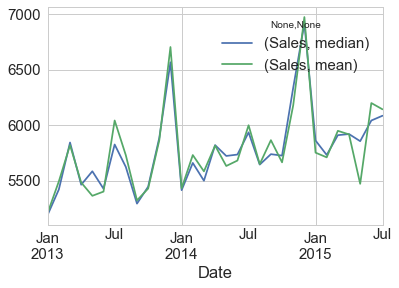

In [42]:
data[['Sales']].resample('M').apply(['median', 'mean']).plot()

<a id="pandas-window-functions"></a>
### Pandas window functions

Pandas rolling.mean and rolling.median are examples of Pandas window function capabilities.

Window functions operate on a set of N consecutive rows (a window) and produce output.

In addition, there are rolling.sum, rolling.min, rolling.max, and many more.

**rolling takes three important parameters: **
- window is the number of days to include in the average 
- center is whether the window should be centered on the date or use data prior to that date 
- freq is on what level to roll-up the averages to (as used in resample). Either D for day, M for month or A for year, etc.

**Another common window function is diff, which takes differences over time.**

Differencing a time series is a very useful way to remove long-term time trends.

pd.diff takes one argument, periods, which is how many rows prior to use for the difference.

For example, if we want to compute the difference in sales, day by day:

In [43]:
data['Sales'].resample('D').mean().diff(periods=1).head(20)

Date
2013-01-01            NaN
2013-01-02    6145.745933
2013-01-03    -539.918386
2013-01-04     261.106726
2013-01-05    -616.467265
2013-01-06   -5208.689686
2013-01-07    9581.115695
2013-01-08   -1863.148879
2013-01-09    -899.402691
2013-01-10       4.378475
2013-01-11     258.135426
2013-01-12   -1813.286996
2013-01-13   -5267.658296
2013-01-14    5150.435874
2013-01-15    -335.602691
2013-01-16    -196.924664
2013-01-17      83.895964
2013-01-18     673.045740
2013-01-19    -113.738117
2013-01-20   -5254.342601
Freq: D, Name: Sales, dtype: float64

However, if we wanted to compare the same day in the prior week, we could set periods=7.

In [44]:
data['Sales'].resample('D').mean().diff(periods=7).head(20)

Date
2013-01-01            NaN
2013-01-02            NaN
2013-01-03            NaN
2013-01-04            NaN
2013-01-05            NaN
2013-01-06            NaN
2013-01-07            NaN
2013-01-08    7759.744139
2013-01-09     714.595516
2013-01-10    1258.892377
2013-01-11    1255.921076
2013-01-12      59.101345
2013-01-13       0.132735
2013-01-14   -4430.547085
2013-01-15   -2903.000897
2013-01-16   -2200.522870
2013-01-17   -2121.005381
2013-01-18   -1706.095067
2013-01-19      -6.546188
2013-01-20       6.769507
Freq: D, Name: Sales, dtype: float64

This would compute the difference in sales, from every day to the same day in the previous week.  

**What would happen if we did not use resample in the above example?**

Hint: Sometimes it would work and sometimes it would fail
    
Why?

<!--
- It's possible to have to events occur at the same time. 
- How would you compute a rolling function in that case?
- One might consider averaging the two events, but that's the same a resampling/aggregting first
-->

**The following plot of the month to month change (diff) in jobs from FiveThirtyEight helps identify the seasonal component to a number of retail jobs:**

![](assets/images/casselman-datalab-wsj2.png)

<a id="pandas-expanding-functions"></a>
### Pandas expanding functions

In addition to the set of “rolling” functions, Pandas also provides a similar set of “expanding” functions.

Instead of using a window of N values, “expanding” functions use all values up until that time. 


We can compute the average sales from the first date until the date specified.

In [45]:
data[['Sales']].resample('D').mean().expanding().mean().head()

,Sales
Date,
2013-01-01,87.284560
2013-01-02,3160.157527
2013-01-03,4004.475720
2013-01-04,4491.911499
2013-01-05,4661.079513


We can also compute the sum of average sales per store up until that date.

In [46]:
data[['Sales']].resample('D').mean().expanding().sum().head()

,Sales
Date,
2013-01-01,87.284560
2013-01-02,6320.315053
2013-01-03,12013.427161
2013-01-04,17967.645995
2013-01-05,23305.397565


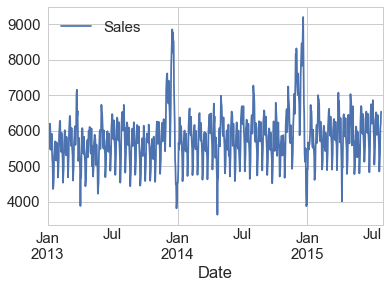

In [47]:
data[['Sales']].resample('D').mean().rolling(window=10, center=True).mean().plot()

This averages all values in the window evenly. However we may want to weight closer values more.

For example, for a centered weighted average of 10 days, we want to put emphasis on +/- 1 day versus +/- 5 days.

One option to do that is the ewma function or the exponential weighted moving average function.

<a id="moving-averages"></a>
###  Moving Averages

- A moving average replaces each data point with an average of k consecutive data points in time.
- Typically, this is k/2 data points prior to and following a given time point, but it could also be the k preceding points.
- These are often referred to as the “rolling” average.
- The measure of average could be mean or median.
- The formula for the rolling mean is

$$F_t = \frac{1}{p} \sum_{k=t}^{t-p+1} Y_k$$

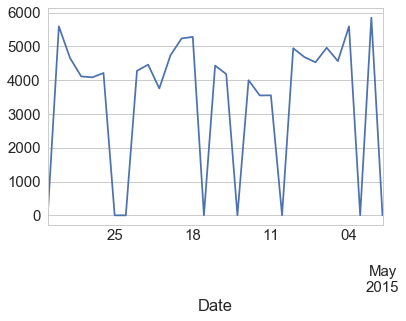

In [48]:
store1_data['2015-05']['Sales'].plot()

Instead of plotting the original time series, we can plot the rolling mean instead.  This smooths random changes in sales as well as removing outliers, helping us identify larger trends.

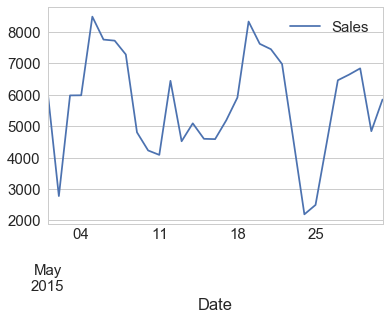

In [51]:
data[['Sales']].resample('D').mean().rolling(window=3, center=True).mean()['2015-05'].plot()

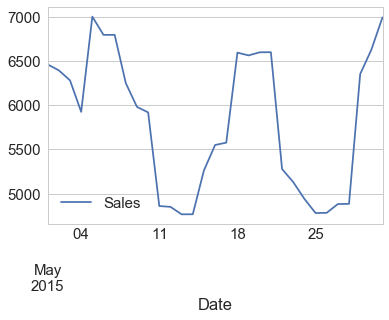

In [52]:
data[['Sales']].resample('D').mean().rolling(window=7, center=True).mean()['2015-05'].plot()

**What would a moving (rolling) mean indicate vs. a moving (rolling) median?**

<!--
- They would both be measures of central tendency over time
- The median would be more sensitive to outliers as usual
- A rolling mean would average all values in the window, but can be skewed by outliers (extremely small or large values).
- This may be useful if we are looking to identify atypical periods or we want to evaluate these odd periods.
- For example, this would be useful if we are trying to identify particularly successful or unsuccessful sales days.
- The rolling median would provide the 50 percentile value for the period and would possibly be more representative of a “typical” day.
-->

**This plot shows the 30-day moving average of the Economic Uncertainty Index.**

Plotting the moving average allows us to more easily visualize trends by smoothing out random fluctuations and removing outliers.

![](assets/images/flowers-datalab-policy-2.gif)

**While identifying the monthly averages is useful, we often want to compare time series data in a local time window.**

To understand holiday sales, we want to compare the sales data of late December to a few days surrounding it.  

We can do this using rolling averages.

In Pandas, we can compute the rolling average using the pd.rolling_mean or pd.rolling_median functions.

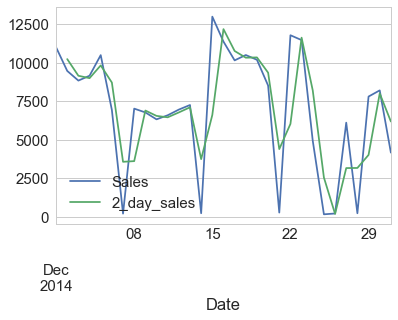

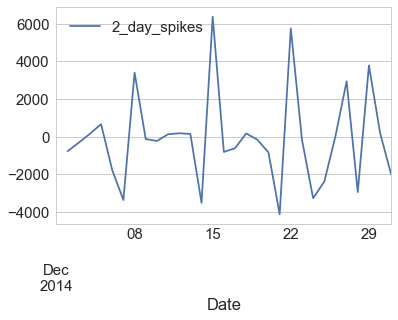

In [53]:
december_sales = data['2014-12'][['Sales']].resample(rule='D').mean().copy()
december_sales['2_day_sales'] = december_sales.rolling(window=2, center=True).mean()
december_sales['2_day_spikes'] = december_sales['Sales'] - december_sales['2_day_sales']
december_sales[['Sales','2_day_sales']].plot()
december_sales[['2_day_spikes']].plot()

As we would expect, there is a weekly spike as we transition from the weekend to the weekday. In this case, we can also see there is a holiday spike.

<a id="exponential-weighted-moving-averages"></a>
### Exponential Weighted Moving Averages

**Taking proximity into account**
- While simple rolling functions weigh all data evenly, it may make sense to weight data closer to our date of interest higher.
- We do this by taking a weighted moving average, where we assign particular weights to certain time points.
- Various formulas or schemes can be used to weight the data points.

A common weighting scheme is an exponential weighted moving average (EWMA) where we add a decay term to give less and less weight to older data points.

The EWMA can be calculated recursively for a series Y.

For t = 1, 
$$EWMA_1 = Y_1$$

For t > 1, 
$$EWMAt = \alpha * Y_t + (1 - \alpha) * EWMA_{t-1}$$


In [55]:
data['Sales'].ewm(span=10).mean().head()

Date
2015-07-31    5263.000000
2015-07-31    5703.550000
2015-07-31    6752.933555
2015-07-31    9138.871782
2015-07-31    7899.615302
Name: Sales, dtype: float64

<a id="autocorrelation"></a>
## Autocorrelation
Objective: Define autocorrelation and use it to analyze a dataset 

In previous classes, we have been concerned with how two variables are correlated (e.g. height and weight, education and salary).

Autocorrelation is how correlated a variable is with itself. Specifically, how related are variables earlier in time with variables later in time.

<a id="why-can-autocorrelation-be-a-problem"></a>
### Why can autocorrelation be a problem?

- When we talked about multi-collinearity, we said that coefficients will be mis-estimated or that they will attribute the explanatory effect to the wrong variables.
- Autocorrelation can pose similar issues
- Typically it's sufficient to know that there is no long-term autocorrelation in your data
  - http://stats.stackexchange.com/questions/19715/why-does-a-time-series-have-to-be-stationary
- Similarly to multi-collinearity, this does not pose as much of an issue when focusing on prediction

<a id="how-to-compute-autocorrelation"></a>
### How to compute autocorrelation

- To compute autocorrelation, we fix a “lag” k.
  - This is how many time points earlier we should use to compute the correlation.

- A lag of 1 computes how correlated a value is with the prior one.  - A lag of 10 computes how correlated a value is with one 10 time points earlier.
- The following formula can be used to calculate autocorrelation.

$$r_k = \frac {\sum_{t = k + 1}^n {(y_t-\bar{y})(y_{t-k}-\bar{y})}} {\sum_{t = 1}^n {(y_t - \bar {y})^2}}$$

**key features:**
- This a lot like normal correlation
- You can think of this as correlation between two variables, $y_t$ and $y_{t-k}$
- $y_t$ is the usual feature that you are working with
- $y_{t-k}$ is the same feature lagged or shifted by some amount of time
- We take the correlation of a variables against its own time-delayed version, hence autocorrelation

**What would a highly autocorrelated timeseries variable look like?**

<!--
We are looking for data that 'echos' itself in some way. By definition we are looking for a signal that repeats itself with some lag or lead. This could be an exact repetition like seasonality or something that shows a similar structure like a linear trend.

Notice that this means trends and seasonality will show autocorrelation
-->

In [56]:
from pandas.tools.plotting import autocorrelation_plot

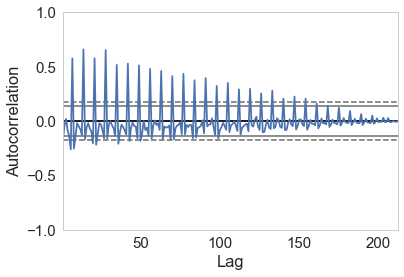

In [63]:
autocorrelation_plot(store1_data['2015']['Sales'])

- **Autocorrelation**: Is the degree of correlation
- **Lag**: Is the number of time periods between the current observation and past observation

Notice the the first spike in correlation for a 7 day lag. Why does this happen?

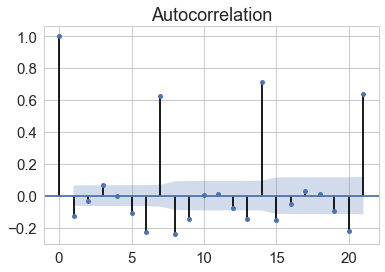

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(store1_data.Sales, lags=21);

### Partial Autocorrelation

You may have noticed that seasonal effects tend to reoccur in an autocorrelation plot. What if we want to look at a 14 day lag, while accounting for the 7 day affect?

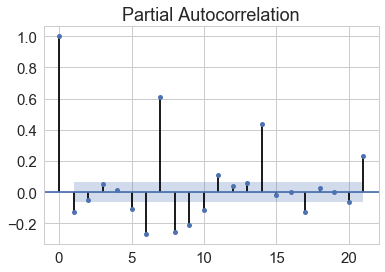

In [64]:
plot_pacf(store1_data.Sales, lags=21);

<a id="exercises"></a>
<a id="exercises"></a>
## Exercises

**Plot the distribution of sales by month and compare the effect of promotions**

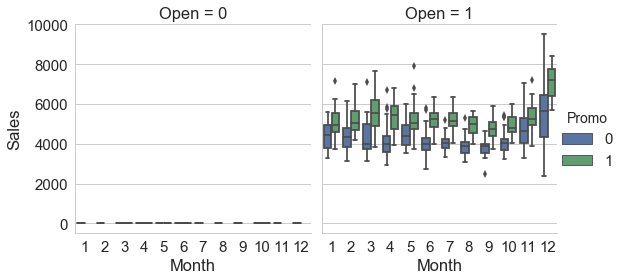

In [80]:
sns.factorplot(
    col='Open',
    hue='Promo',
    x='Month',
    y='Sales',
    data=store1_data, 
    kind='box')

**Are sales more correlated with the prior date, a similar date last year, or a similar date last month?**

In [101]:
# Get mean daily sales
average_daily_sales = data[['Sales']].resample('D').mean()

print('Correlation with last day: {}'.format(average_daily_sales['Sales'].autocorr(lag=1)))
print('Correlation with last week: {}'.format(average_daily_sales['Sales'].autocorr(lag=7)))
print('Correlation with last month: {}'.format(average_daily_sales['Sales'].autocorr(lag=31)))
print('Correlation with last year: {}'.format(average_daily_sales['Sales'].autocorr(lag=365)))

Correlation with last day: -0.0258582760064
Correlation with last week: 0.557489358874
Correlation with last month: -0.0490079878461
Correlation with last year: 0.0202385294483


**Plot the 15 day rolling mean of customers.**

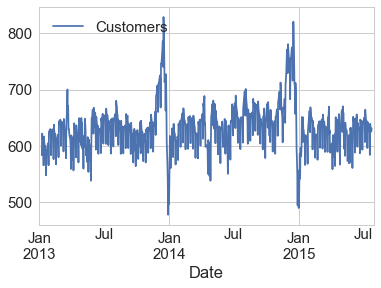

In [97]:
rolling_mean = data[['Customers']].resample('D').mean().rolling(window=15, center=True).mean()
rolling_mean.plot()

**Identify the date with largest drop in sales from the same date in the previous week.**

In [102]:
# Get average daily sales difference with previous week
average_daily_sales = data[['Sales', 'Open']].resample('D').mean()
average_daily_sales['DiffVsLastWeek'] = average_daily_sales[['Sales']].diff(periods=7)

print average_daily_sales.sort_values(by='DiffVsLastWeek').head()
# Unsurprisingly, this day is Dec. 25 and Dec. 26 in 2014 and 2015.
# When the store is closed and there are many sales in the preceding week. How, about when the store is open?

print average_daily_sales[average_daily_sales.Open == 1].sort_values(by='DiffVsLastWeek').head()
# The top values are Dec. 24 and then 2013-12-09 and 2013-10-14
# where on average sales were 4k lower than the same day in the previous week.

                 Sales      Open  DiffVsLastWeek
Date                                            
2015-04-06  244.772197  0.028700   -10850.701345
2013-12-25  127.878924  0.015247   -10804.564126
2013-12-26  169.145291  0.017040   -10360.247534
2014-12-25  166.188235  0.017112   -10323.878075
2014-04-21  216.132735  0.028700   -10262.018834
                  Sales  Open  DiffVsLastWeek
Date                                         
2013-12-24  4693.101345   1.0    -7014.515695
2014-12-24  4933.386096   1.0    -5209.272727
2013-12-09  6822.938117   1.0    -4811.537220
2013-10-14  5893.636771   1.0    -4027.798206
2015-04-20  5909.294170   1.0    -4023.443049


**Compute the total sales up until Dec. 2014.**

In [103]:
# Get total daily sales across all stores
total_daily_sales = data[['Sales']].resample('D').sum()

# Get total sales up until Dec 2014
total_daily_sales.expanding(min_periods=1).sum()['2014-12'].head()

,Sales
Date,
2014-12-01,4.291837e+09
2014-12-02,4.300681e+09
2014-12-03,4.308939e+09
2014-12-04,4.317493e+09
2014-12-05,4.327295e+09


**When were the largest differences between 15-day moving/rolling averages?  HINT:  Using rolling_mean and diff**

In [104]:
# Get mean daily sales across all stores
average_daily_sales = data[['Sales']].resample('D').mean()

# Get largest 15-day rolling average difference
average_daily_sales.rolling(freq='D', window=15).mean().diff(1).sort_values(by='Sales').head()

# Unsurprisingly, they occur at the beginning of every year after the holiday season.)+

,Sales
Date,
2014-01-01,-773.446039
2015-01-01,-668.394774
2013-12-31,-663.000538
2014-01-05,-596.739073
2014-05-01,-585.158326


# TOPIC REVIEW

- What are some unique challenges of time series?
<!--
Hard to calculate
More opportunities for unwanted correlation
-->
- What were the two most common decompositions that we want to identify in time series data?
<!-- We want to identify whether changes are true trends or seasonal changes. -->
- Why do we bother to use rolling means or medians?
<!-- 
Rolling means give us a local statistic of an average in time, smoothing out random fluctuations and removing outliers. -->
- What is autocorrelation?
<!-- Autocorrelations are a measure of how much a data point is dependent on previous data points. -->